![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/01.0.SparkNLP_Basics.ipynb)

# **Spark NLP Basics and Pretrained Pipelines**

## **0. Colab Setup**

In [ ]:
!pip install -q pyspark==3.4.1 spark-nlp==5.1.2


#### **How to prevent Google Colab from disconnecting?**

Google Colab notebooks have an idle timeout of 90 minutes and absolute timeout of 12 hours. This means, if user does not interact with his Google Colab notebook for more than 90 minutes, its instance is automatically terminated. Also, maximum lifetime of a Colab instance is **12 hours.**

Set a javascript interval to click on the connect button every 60 seconds. Open developer-settings (in your web-browser) with Ctrl+Shift+I then click on console tab and type this on the console prompt. (for mac press Option+Command+I)



In [ ]:
'''
function ConnectButton(){
    console.log("Connect pushed");
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
}
setInterval(ConnectButton,60000);

'''

## **1. Start Spark Session**

In [3]:
import sparknlp

spark = sparknlp.start()
# params =>> gpu=False

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 5.1.2
Apache Spark version: 3.4.1


In [59]:
! cd ~/.ivy2/cache/com.johnsnowlabs.nlp/spark-nlp_2.12/jars && ls -lt

total 45008
-rw-r--r-- 1 root root 46082433 Sep 25 17:00 spark-nlp_2.12-5.1.2.jar


If you want to start `SparkSession` with your own parameters or you need to load the required jars/packages from your local disk, or you have no internet connection (that would be needed to pull the required packages from internet), you can skip `sparknlp.start()` and start your session manually as shown below.


In [5]:
"""
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Spark NLP Enterprise 4.0.0") \
    .master("local[8]") \
    .config("spark.driver.memory","12G") \
    .config("spark.driver.maxResultSize", "2G") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .config("spark.kryoserializer.buffer.max", "800M")\
    .config("spark.jars", "{}spark-nlp-4.0.0.jar,{}spark-nlp-jsl-4.0.0.jar".format(jar_path,jar_path)) \
    .getOrCreate()

"""

'\nfrom pyspark.sql import SparkSession\n\nspark = SparkSession.builder     .appName("Spark NLP Enterprise 4.0.0")     .master("local[8]")     .config("spark.driver.memory","12G")     .config("spark.driver.maxResultSize", "2G")     .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer")     .config("spark.kryoserializer.buffer.max", "800M")    .config("spark.jars", "{}spark-nlp-4.0.0.jar,{}spark-nlp-jsl-4.0.0.jar".format(jar_path,jar_path))     .getOrCreate()\n\n'

## **2. Using Pretrained Pipelines**

https://github.com/JohnSnowLabs/spark-nlp-models (not maintained)

https://nlp.johnsnowlabs.com/models


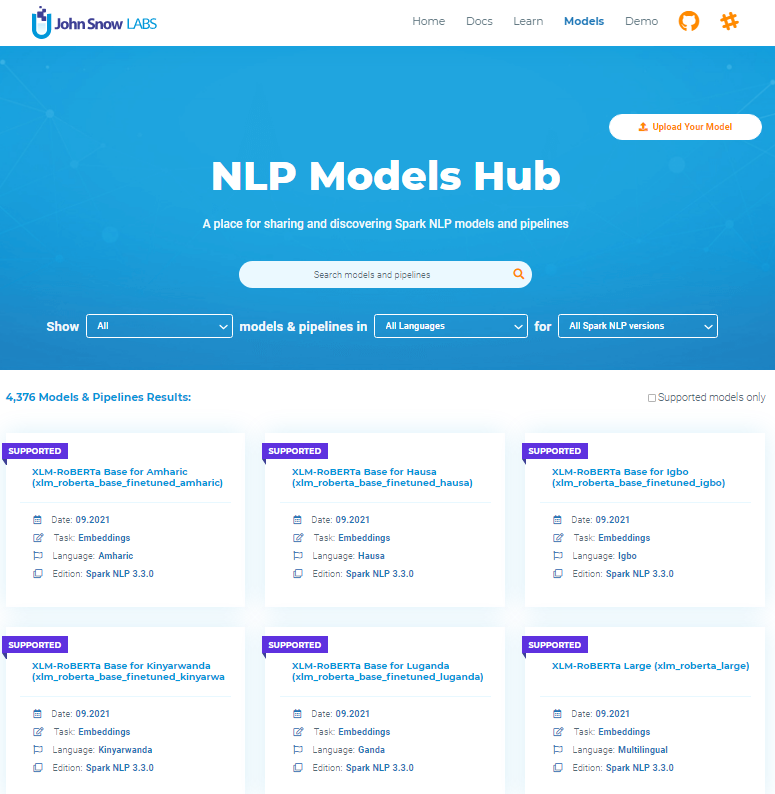

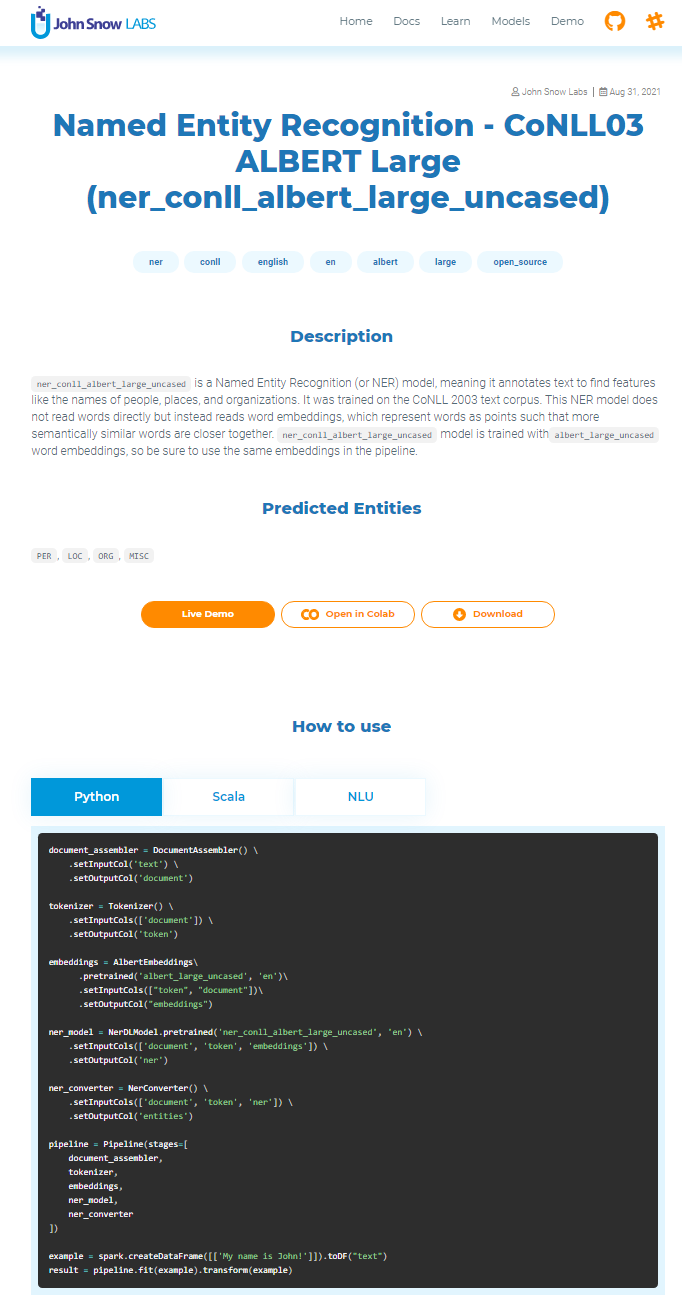

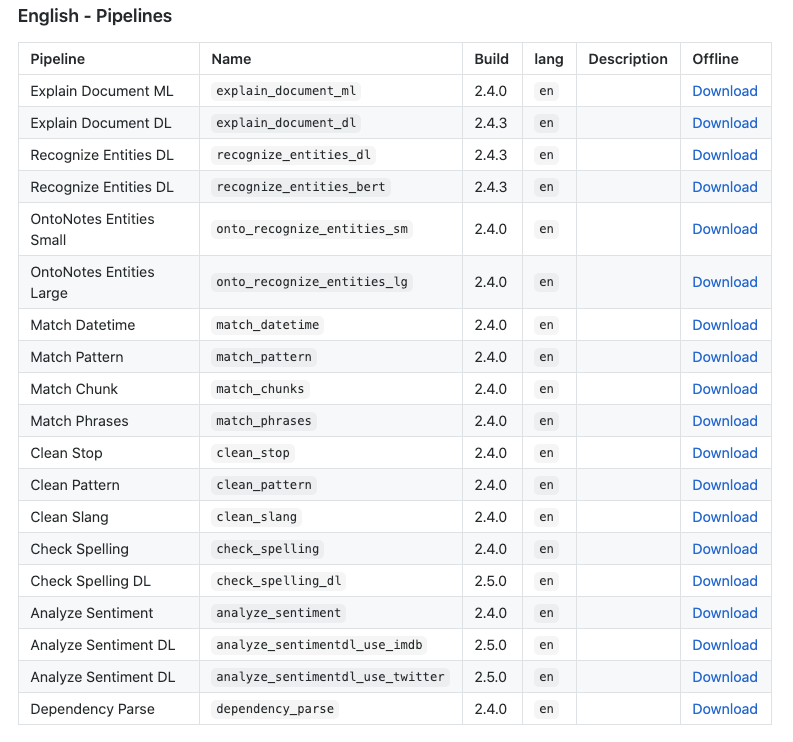

In [6]:
from sparknlp.pretrained import ResourceDownloader
ResourceDownloader.showPublicPipelines(lang="en")

+---------------------------------------------------------------------------------------------------------------+------+---------+
| Pipeline                                                                                                      | lang | version |
+---------------------------------------------------------------------------------------------------------------+------+---------+
| dependency_parse                                                                                              |  en  | 2.0.2   |
| check_spelling                                                                                                |  en  | 2.1.0   |
| match_datetime                                                                                                |  en  | 2.1.0   |
| match_pattern                                                                                                 |  en  | 2.1.0   |
| clean_pattern                                                                    

📌 Extend support for downloading models/pipelines directly by given name or S3 path in ResourceDownloader



```
from sparknlp.pretrained import ResourceDownloader

# partial S3 path
ResourceDownloader.downloadModelDirectly("public/models/albert_base_sequence_classifier_ag_news_en_3.4.0_3.0_1639648298937.zip", remote_loc = "public/models")

# full S3 path
ResourceDownloader.downloadModelDirectly("s3://auxdata.johnsnowlabs.com/public/models/albert_base_sequence_classifier_ag_news_en_3.4.0_3.0_1639648298937.zip", remote_loc = "public/models", unzip = False)
```



In [7]:
from sparknlp.pretrained import PretrainedPipeline

In [8]:
testDoc = '''
Peter is a very good persn.
My life in Russia is very intersting.
John and Peter are brthers. However they don't support each other that much.
Lucas Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!
'''

### 2.1. Explain Document ML

**Stages**
- DocumentAssembler
- SentenceDetector
- Tokenizer
- Lemmatizer
- Stemmer
- Part of Speech
- SpellChecker (Norvig)




In [9]:
pipeline = PretrainedPipeline('explain_document_ml', lang='en')

explain_document_ml download started this may take some time.
Approx size to download 9 MB
[OK!]


In [10]:
pipeline.model.stages

[document_811d40a38b24,
 SENTENCE_ce56851acebe,
 REGEX_TOKENIZER_e3f6c1c7744c,
 SPELL_79c88338ef12,
 LEMMATIZER_c62ad8f355f9,
 STEMMER_caf11d1f4d0e,
 POS_dbb704204f6f]

In [11]:
# Load pretrained pipeline from local disk:

pipeline_local = PretrainedPipeline.from_disk('/root/cache_pretrained/explain_document_ml_en_4.4.2_3.4_1685040778279')

In [12]:
%%time

result = pipeline.annotate(testDoc)

CPU times: user 49.5 ms, sys: 16.7 ms, total: 66.2 ms
Wall time: 1.68 s


In [13]:
result.keys()

dict_keys(['document', 'spell', 'pos', 'lemmas', 'token', 'stems', 'sentence'])

In [14]:
result['sentence']

['Peter is a very good persn.',
 'My life in Russia is very intersting.',
 'John and Peter are brthers.',
 "However they don't support each other that much.",
 'Lucas Dunbercker is no longer happy.',
 'He has a good car though.',
 'Europe is very culture rich.',
 'There are huge churches!',
 'and big houses!']

In [15]:
result['token']

['Peter',
 'is',
 'a',
 'very',
 'good',
 'persn',
 '.',
 'My',
 'life',
 'in',
 'Russia',
 'is',
 'very',
 'intersting',
 '.',
 'John',
 'and',
 'Peter',
 'are',
 'brthers',
 '.',
 'However',
 'they',
 "don't",
 'support',
 'each',
 'other',
 'that',
 'much',
 '.',
 'Lucas',
 'Dunbercker',
 'is',
 'no',
 'longer',
 'happy',
 '.',
 'He',
 'has',
 'a',
 'good',
 'car',
 'though',
 '.',
 'Europe',
 'is',
 'very',
 'culture',
 'rich',
 '.',
 'There',
 'are',
 'huge',
 'churches',
 '!',
 'and',
 'big',
 'houses',
 '!']

In [16]:
list(zip(result['token'], result['pos']))

[('Peter', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('persn', 'NN'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('life', 'NN'),
 ('in', 'IN'),
 ('Russia', 'NNP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('intersting', 'JJ'),
 ('.', '.'),
 ('John', 'NNP'),
 ('and', 'CC'),
 ('Peter', 'NNP'),
 ('are', 'VBP'),
 ('brthers', 'NNS'),
 ('.', '.'),
 ('However', 'RB'),
 ('they', 'PRP'),
 ("don't", 'VBP'),
 ('support', 'VB'),
 ('each', 'DT'),
 ('other', 'JJ'),
 ('that', 'IN'),
 ('much', 'JJ'),
 ('.', '.'),
 ('Lucas', 'NNP'),
 ('Dunbercker', 'NNP'),
 ('is', 'VBZ'),
 ('no', 'DT'),
 ('longer', 'RB'),
 ('happy', 'JJ'),
 ('.', '.'),
 ('He', 'PRP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('car', 'NN'),
 ('though', 'IN'),
 ('.', '.'),
 ('Europe', 'NNP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('culture', 'RB'),
 ('rich', 'JJ'),
 ('.', '.'),
 ('There', 'EX'),
 ('are', 'VBP'),
 ('huge', 'JJ'),
 ('churches', 'NNS'),
 ('!', '.'),
 ('and', 'CC'),
 ('big', 'JJ'),
 ('houses', 'NNS'),
 ('!', 

In [17]:
list(zip(result['token'], result['lemmas'], result['stems'], result['spell']))

[('Peter', 'Peter', 'peter', 'Peter'),
 ('is', 'be', 'i', 'is'),
 ('a', 'a', 'a', 'a'),
 ('very', 'very', 'veri', 'very'),
 ('good', 'good', 'good', 'good'),
 ('persn', 'person', 'person', 'person'),
 ('.', '.', '.', '.'),
 ('My', 'My', 'my', 'My'),
 ('life', 'life', 'life', 'life'),
 ('in', 'in', 'in', 'in'),
 ('Russia', 'Russia', 'russia', 'Russia'),
 ('is', 'be', 'i', 'is'),
 ('very', 'very', 'veri', 'very'),
 ('intersting', 'interest', 'interest', 'interesting'),
 ('.', '.', '.', '.'),
 ('John', 'John', 'john', 'John'),
 ('and', 'and', 'and', 'and'),
 ('Peter', 'Peter', 'peter', 'Peter'),
 ('are', 'be', 'ar', 'are'),
 ('brthers', 'brother', 'brother', 'brothers'),
 ('.', '.', '.', '.'),
 ('However', 'However', 'howev', 'However'),
 ('they', 'they', 'thei', 'they'),
 ("don't", "don't", "don't", "don't"),
 ('support', 'support', 'support', 'support'),
 ('each', 'each', 'each', 'each'),
 ('other', 'other', 'other', 'other'),
 ('that', 'that', 'that', 'that'),
 ('much', 'much', 'much',

In [18]:
import pandas as pd

pd.set_option("display.max_rows", 100)

df = pd.DataFrame({'token':result['token'],
                   'corrected':result['spell'],
                   'POS':result['pos'],
                   'lemmas':result['lemmas'],
                   'stems':result['stems']})
df

,token,corrected,POS,lemmas,stems
0,Peter,Peter,NNP,Peter,peter
1,is,is,VBZ,be,i
2,a,a,DT,a,a
3,very,very,RB,very,veri
4,good,good,JJ,good,good
5,persn,person,NN,person,person
6,.,.,.,.,.
7,My,My,PRP$,My,my
8,life,life,NN,life,life
9,in,in,IN,in,in


### 2.2. Explain Document DL

**Stages**
- DocumentAssembler
- SentenceDetector
- Tokenizer
- NER (NER with GloVe 100D embeddings, CoNLL2003 dataset)
- Lemmatizer
- Stemmer
- Part of Speech
- SpellChecker (Norvig)


In [19]:
pipeline_dl = PretrainedPipeline('explain_document_dl', lang='en')

explain_document_dl download started this may take some time.
Approx size to download 168 MB
[OK!]


In [20]:
pipeline_dl.model.stages

[document_7939d5bf1083,
 SENTENCE_05265b07c745,
 REGEX_TOKENIZER_b3f969d18fa3,
 SPELL_e4ea67180337,
 LEMMATIZER_c62ad8f355f9,
 STEMMER_ba49f7631065,
 POS_d01c734956fe,
 WORD_EMBEDDINGS_MODEL_48cffc8b9a76,
 NerDLModel_d4424c9af5f4,
 NER_CONVERTER_a81db9af2d23]

In [21]:
pipeline_dl.model.stages[-2].getStorageRef()

'glove_100d'

In [22]:
pipeline_dl.model.stages[-3].getStorageRef()

'glove_100d'

In [23]:
pipeline_dl.model.stages[-2].getClasses()

['O', 'B-ORG', 'B-LOC', 'B-PER', 'I-PER', 'I-ORG', 'B-MISC', 'I-LOC', 'I-MISC']

In [24]:
%%time

result = pipeline_dl.annotate(testDoc)

result.keys()

CPU times: user 69.5 ms, sys: 18.2 ms, total: 87.7 ms
Wall time: 1.96 s


dict_keys(['entities', 'stem', 'checked', 'lemma', 'document', 'pos', 'token', 'ner', 'embeddings', 'sentence'])

In [25]:
result.keys()

dict_keys(['entities', 'stem', 'checked', 'lemma', 'document', 'pos', 'token', 'ner', 'embeddings', 'sentence'])

In [26]:
result['entities']

['Peter', 'Russia', 'John', 'Peter', 'Lucas Dunbercker', 'Europe']

In [27]:
df = pd.DataFrame({'token':result['token'],
                   'ner_label':result['ner'],
                   'spell_corrected':result['checked'],
                   'POS':result['pos'],
                   'lemmas':result['lemma'],
                   'stems':result['stem']})

df

,token,ner_label,spell_corrected,POS,lemmas,stems
0,Peter,B-PER,Peter,NNP,Peter,peter
1,is,O,is,VBZ,be,i
2,a,O,a,DT,a,a
3,very,O,very,RB,very,veri
4,good,O,good,JJ,good,good
5,persn,O,person,NN,person,person
6,.,O,.,.,.,.
7,My,O,My,PRP$,My,my
8,life,O,life,NN,life,life
9,in,O,in,IN,in,in


### 2.3. Recognize Entities DL

In [28]:
recognize_entities = PretrainedPipeline('recognize_entities_dl', lang='en')

recognize_entities_dl download started this may take some time.
Approx size to download 159 MB
[OK!]


In [29]:
recognize_entities.model.stages

[document_1c58bc1aca5d,
 SENTENCE_328d8a47c1a8,
 REGEX_TOKENIZER_959cd9403d10,
 WORD_EMBEDDINGS_MODEL_48cffc8b9a76,
 NerDLModel_d4424c9af5f4,
 NER_CONVERTER_389b80afbf7d]

In [30]:
recognize_entities.model.stages[3].getStorageRef()

'glove_100d'

In [31]:
recognize_entities.model.stages[4].getStorageRef()

'glove_100d'

In [32]:
recognize_entities.model.stages[4].getClasses()

['O', 'B-ORG', 'B-LOC', 'B-PER', 'I-PER', 'I-ORG', 'B-MISC', 'I-LOC', 'I-MISC']

In [33]:
testDoc = '''
Peter is a very good persn.
My life in Russia is very intersting.
John and Peter are brthers. However they don't support each other that much.
Lucas Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!
'''

result = recognize_entities.annotate(testDoc)

list(zip(result['token'], result['ner']))

[('Peter', 'B-PER'),
 ('is', 'O'),
 ('a', 'O'),
 ('very', 'O'),
 ('good', 'O'),
 ('persn', 'O'),
 ('.', 'O'),
 ('My', 'O'),
 ('life', 'O'),
 ('in', 'O'),
 ('Russia', 'B-LOC'),
 ('is', 'O'),
 ('very', 'O'),
 ('intersting', 'O'),
 ('.', 'O'),
 ('John', 'B-PER'),
 ('and', 'O'),
 ('Peter', 'B-PER'),
 ('are', 'O'),
 ('brthers', 'O'),
 ('.', 'O'),
 ('However', 'O'),
 ('they', 'O'),
 ("don't", 'O'),
 ('support', 'O'),
 ('each', 'O'),
 ('other', 'O'),
 ('that', 'O'),
 ('much', 'O'),
 ('.', 'O'),
 ('Lucas', 'B-PER'),
 ('Dunbercker', 'I-PER'),
 ('is', 'O'),
 ('no', 'O'),
 ('longer', 'O'),
 ('happy', 'O'),
 ('.', 'O'),
 ('He', 'O'),
 ('has', 'O'),
 ('a', 'O'),
 ('good', 'O'),
 ('car', 'O'),
 ('though', 'O'),
 ('.', 'O'),
 ('Europe', 'B-LOC'),
 ('is', 'O'),
 ('very', 'O'),
 ('culture', 'O'),
 ('rich', 'O'),
 ('.', 'O'),
 ('There', 'O'),
 ('are', 'O'),
 ('huge', 'O'),
 ('churches', 'O'),
 ('!', 'O'),
 ('and', 'O'),
 ('big', 'O'),
 ('houses', 'O'),
 ('!', 'O')]

### Clean Stop Words

In [34]:
clean_stop = PretrainedPipeline('clean_stop', lang='en')

clean_stop download started this may take some time.
Approx size to download 13.8 KB
[OK!]


In [35]:
clean_stop.model.stages # clean stop pipeline stages

[document_90b4be8a6e0b,
 SENTENCE_8ba1e4f73af0,
 REGEX_TOKENIZER_8af63c5a17f5,
 STOPWORDS_CLEANER_b5d381c851f5]

In [36]:
result = clean_stop.annotate(testDoc)
result.keys()

dict_keys(['document', 'sentence', 'token', 'cleanTokens'])

In [37]:
' '.join(result['cleanTokens'])

"Peter good persn . life Russia intersting . John Peter brthers . don't support . Lucas Dunbercker longer happy . good car . Europe culture rich . huge churches ! big houses !"

### 2.4. Spell Checker

(Norvig Algo)

ref: https://norvig.com/spell-correct.html

In [38]:
spell_checker = PretrainedPipeline('check_spelling', lang='en')

check_spelling download started this may take some time.
Approx size to download 884.9 KB
[OK!]


In [39]:
testDoc = '''
Peter is a very good persn.
My life in Russia is very intersting.
John and Peter are brthers. However they don't support each other that much.
Lucas Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!
'''

result = spell_checker.annotate(testDoc)

result.keys()

dict_keys(['document', 'sentence', 'token', 'checked'])

In [40]:
list(zip(result['token'], result['checked']))

[('Peter', 'Peter'),
 ('is', 'is'),
 ('a', 'a'),
 ('very', 'very'),
 ('good', 'good'),
 ('persn', 'person'),
 ('.', '.'),
 ('My', 'My'),
 ('life', 'life'),
 ('in', 'in'),
 ('Russia', 'Russia'),
 ('is', 'is'),
 ('very', 'very'),
 ('intersting', 'interesting'),
 ('.', '.'),
 ('John', 'John'),
 ('and', 'and'),
 ('Peter', 'Peter'),
 ('are', 'are'),
 ('brthers', 'brothers'),
 ('.', '.'),
 ('However', 'However'),
 ('they', 'they'),
 ("don't", "don't"),
 ('support', 'support'),
 ('each', 'each'),
 ('other', 'other'),
 ('that', 'that'),
 ('much', 'much'),
 ('.', '.'),
 ('Lucas', 'Lucas'),
 ('Dunbercker', 'Dunbercker'),
 ('is', 'is'),
 ('no', 'no'),
 ('longer', 'longer'),
 ('happy', 'happy'),
 ('.', '.'),
 ('He', 'He'),
 ('has', 'has'),
 ('a', 'a'),
 ('good', 'good'),
 ('car', 'car'),
 ('though', 'though'),
 ('.', '.'),
 ('Europe', 'Europe'),
 ('is', 'is'),
 ('very', 'very'),
 ('culture', 'culture'),
 ('rich', 'rich'),
 ('.', '.'),
 ('There', 'There'),
 ('are', 'are'),
 ('huge', 'huge'),
 ('chu

### 2.5. Parsing a list of texts

In [41]:
testDoc_list = ['French author who helped pioner the science-fiction genre.',
'Verne wrate about space, air, and underwater travel before navigable aircrast',
'Practical submarines were invented, and before any means of space travel had been devised.']

testDoc_list

['French author who helped pioner the science-fiction genre.',
 'Verne wrate about space, air, and underwater travel before navigable aircrast',
 'Practical submarines were invented, and before any means of space travel had been devised.']

In [42]:
pipeline = PretrainedPipeline('explain_document_ml', lang='en')

explain_document_ml download started this may take some time.
Approx size to download 9 MB
[OK!]


In [43]:
result_list = pipeline.annotate(testDoc_list)

len (result_list)

3

In [44]:
result_list[0]

{'document': ['French author who helped pioner the science-fiction genre.'],
 'spell': ['French',
  'author',
  'who',
  'helped',
  'pioneer',
  'the',
  'sciencefiction',
  'genre',
  '.'],
 'pos': ['JJ', 'NN', 'WP', 'VBD', 'NN', 'DT', 'NN', 'NN', '.'],
 'lemmas': ['French',
  'author',
  'who',
  'help',
  'pioneer',
  'the',
  'sciencefiction',
  'genre',
  '.'],
 'token': ['French',
  'author',
  'who',
  'helped',
  'pioner',
  'the',
  'science-fiction',
  'genre',
  '.'],
 'stems': ['french',
  'author',
  'who',
  'help',
  'pioneer',
  'the',
  'sciencefict',
  'genr',
  '.'],
 'sentence': ['French author who helped pioner the science-fiction genre.']}

### Using fullAnnotate to get more details



```
annotatorType: String,
begin: Int,
end: Int,
result: String, (this is what annotate returns)
metadata: Map[String, String],
embeddings: Array[Float]
```

In [45]:
text = 'Peter Parker is a nice guy and lives in New York'

In [46]:
# pipeline_dl >> explain_document_dl

detailed_result = pipeline_dl.fullAnnotate(text)

In [47]:
detailed_result

[{'entities': [Annotation(chunk, 0, 11, Peter Parker, {'entity': 'PER', 'sentence': '0', 'chunk': '0'}, []),
   Annotation(chunk, 40, 47, New York, {'entity': 'LOC', 'sentence': '0', 'chunk': '1'}, [])],
  'stem': [Annotation(token, 0, 4, peter, {'confidence': '1.0', 'sentence': '0'}, []),
   Annotation(token, 6, 11, parker, {'confidence': '1.0', 'sentence': '0'}, []),
   Annotation(token, 13, 14, i, {'confidence': '1.0', 'sentence': '0'}, []),
   Annotation(token, 16, 16, a, {'confidence': '1.0', 'sentence': '0'}, []),
   Annotation(token, 18, 21, nice, {'confidence': '1.0', 'sentence': '0'}, []),
   Annotation(token, 23, 25, gui, {'confidence': '1.0', 'sentence': '0'}, []),
   Annotation(token, 27, 29, and, {'confidence': '1.0', 'sentence': '0'}, []),
   Annotation(token, 31, 35, live, {'confidence': '1.0', 'sentence': '0'}, []),
   Annotation(token, 37, 38, in, {'confidence': '1.0', 'sentence': '0'}, []),
   Annotation(token, 40, 42, new, {'confidence': '1.0', 'sentence': '0'}, []),

In [48]:
detailed_result[0]['entities']

[Annotation(chunk, 0, 11, Peter Parker, {'entity': 'PER', 'sentence': '0', 'chunk': '0'}, []),
 Annotation(chunk, 40, 47, New York, {'entity': 'LOC', 'sentence': '0', 'chunk': '1'}, [])]

In [49]:
detailed_result[0]['entities'][0].result

'Peter Parker'

In [50]:
print("metadata dict:",detailed_result[0]["entities"][0].metadata)
print("entity type",detailed_result[0]["entities"][0].metadata["entity"])

metadata dict: {'entity': 'PER', 'sentence': '0', 'chunk': '0'}
entity type PER


In [51]:
chunks=[]
entities=[]

for n in detailed_result[0]['entities']:

  chunks.append(n.result)
  entities.append(n.metadata['entity'])

df = pd.DataFrame({'chunks':chunks, 'entities':entities})
df

,chunks,entities
0,Peter Parker,PER
1,New York,LOC


In [52]:
tuples = []

for x,y,z in zip(detailed_result[0]["token"], detailed_result[0]["pos"], detailed_result[0]["ner"]):

  tuples.append((int(x.metadata['sentence']), x.result, x.begin, x.end, y.result, z.result))

df = pd.DataFrame(tuples, columns=['sent_id','token','start','end','pos', 'ner'])

df


,sent_id,token,start,end,pos,ner
0,0,Peter,0,4,NNP,B-PER
1,0,Parker,6,11,NNP,I-PER
2,0,is,13,14,VBZ,O
3,0,a,16,16,DT,O
4,0,nice,18,21,JJ,O
5,0,guy,23,25,NN,O
6,0,and,27,29,CC,O
7,0,lives,31,35,NNS,O
8,0,in,37,38,IN,O
9,0,New,40,42,NNP,B-LOC


### 2.6. Sentiment Analysis


#### Vivek algo

paper: `Fast and accurate sentiment classification using an enhanced Naive Bayes model`

https://arxiv.org/abs/1305.6143

code `https://github.com/vivekn/sentiment`

In [53]:
sentiment = PretrainedPipeline('analyze_sentiment', lang='en')

analyze_sentiment download started this may take some time.
Approx size to download 4.8 MB
[OK!]


In [54]:
result = sentiment.annotate("The movie I watched today was not a good one")

result['sentiment']

['negative']

#### DL version (trained on imdb)

In [55]:
sentiment_imdb = PretrainedPipeline('analyze_sentimentdl_use_imdb', lang='en')

analyze_sentimentdl_use_imdb download started this may take some time.
Approx size to download 935.7 MB
[OK!]


In [56]:
sentiment_imdb_glove = PretrainedPipeline('analyze_sentimentdl_glove_imdb', lang='en')

analyze_sentimentdl_glove_imdb download started this may take some time.
Approx size to download 154.1 MB
[OK!]


In [57]:
comment = '''
It's a very scary film but what impressed me was how true the film sticks to the original's tricks; it isn't filled with loud in-your-face jump scares, in fact, a lot of what makes this film scary is the slick cinematography and intricate shadow play. The use of lighting and creation of atmosphere is what makes this film so tense, which is why it's perfectly suited for those who like Horror movies but without the obnoxious gore.
'''
result = sentiment_imdb_glove.annotate(comment)

result['sentiment']

['pos']

In [58]:
sentiment_imdb_glove.fullAnnotate(comment)[0]['sentiment']

[Annotation(category, 0, 433, pos, {'sentence': '0', 'pos': '0.98675287', 'neg': '0.013247096'}, [])]